In [1]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Coeff_Estimation.csv')

# We scale 2 columns by a factor of 100 to account for the variances that otherwise vary too much in factor

df$Impulsive <- df$Impulsive * 100
df$Sensation_seeking <- df$Sensation_seeking * 100

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-21.712,-118.084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-71.126,-21.575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-137.983,40.148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-137.983,-118.084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-21.712,-21.575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-137.983,-154.858,6,0,0


In [4]:
# Not sure yet if the labels should also be ordered, since they are already numerical, they are ordinal however

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [5]:
# Creating the cor matrix and visually inspecting it

M <- lavCor(df)
M

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.15046761,-0.02788125,-0.23929895,0.07019570,0.211937645,-0.20496263,-0.35006985,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.07039285,-0.06116698,0.13599424,-0.22038676,-0.183906636,0.16749166,0.24427660,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.10283732,0.12035190,0.06496818,0.09246585,0.245952853,-0.13597674,-0.13458276,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.00000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,0.17722595,0.08466570,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.43296725,1.00000000,0.23606577,0.15906490,0.318780114,0.10804309,0.20457370,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.01662559,0.23606577,1.00000000,0.03280548,-0.059995922,0.27441450,0.41986449,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.21514520,0.15906490,0.03280548,1.00000000,0.249608607,-0.23174009,-0.21242041,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.39867855,0.31878011,-0.05999592,0.24960861,1.000000000,-0.34225017,-0.23258588,-0.004265342,-0.29270898,-0.25711483
Impulsive,-0.20496263,0.16749166,-0.13597674,0.17722595,0.10804309,0.27441450,-0.23174009,-0.342250166,1.00000000,0.62311964,0.028282154,0.32288619,0.25227672
Sensation_seeking,-0.35006985,0.24427660,-0.13458276,0.08466570,0.20457370,0.41986449,-0.21242041,-0.232585875,0.62311964,1.00000000,0.017958549,0.47202821,0.29704230


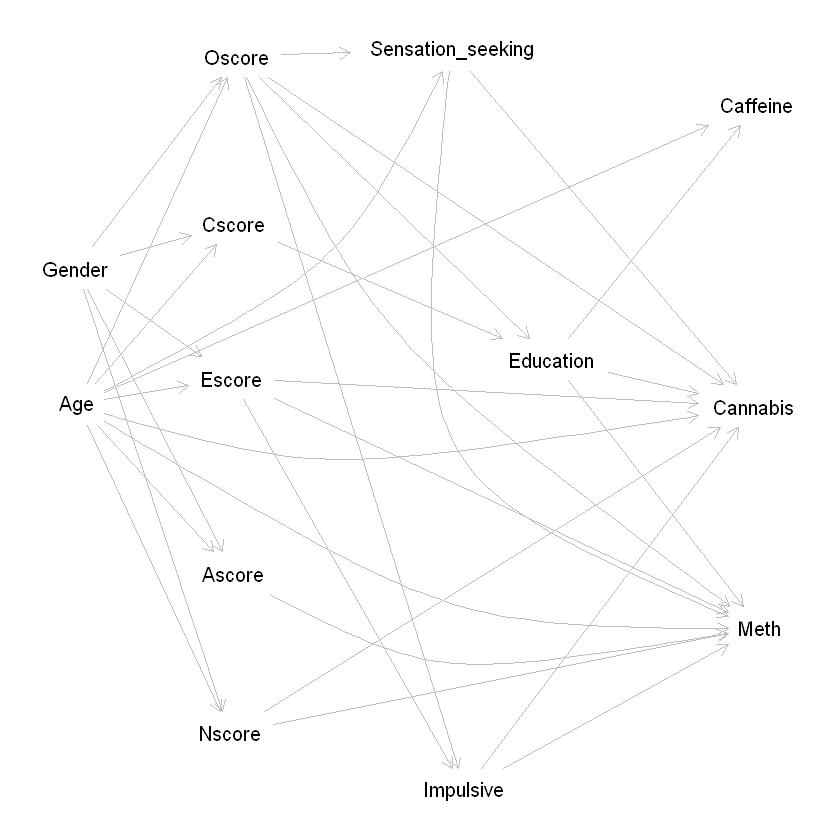

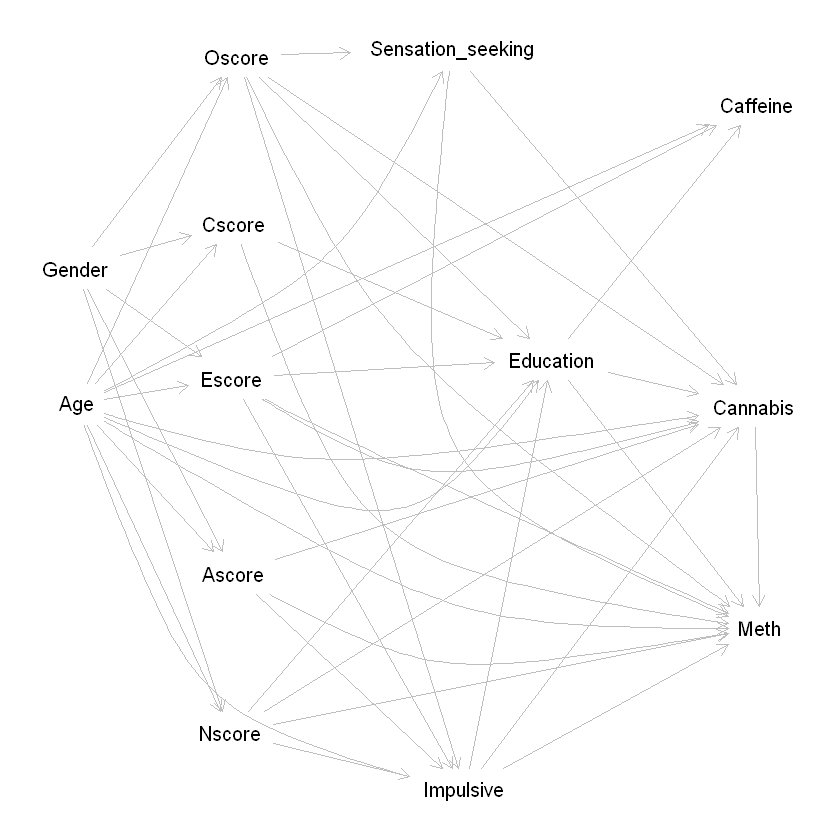

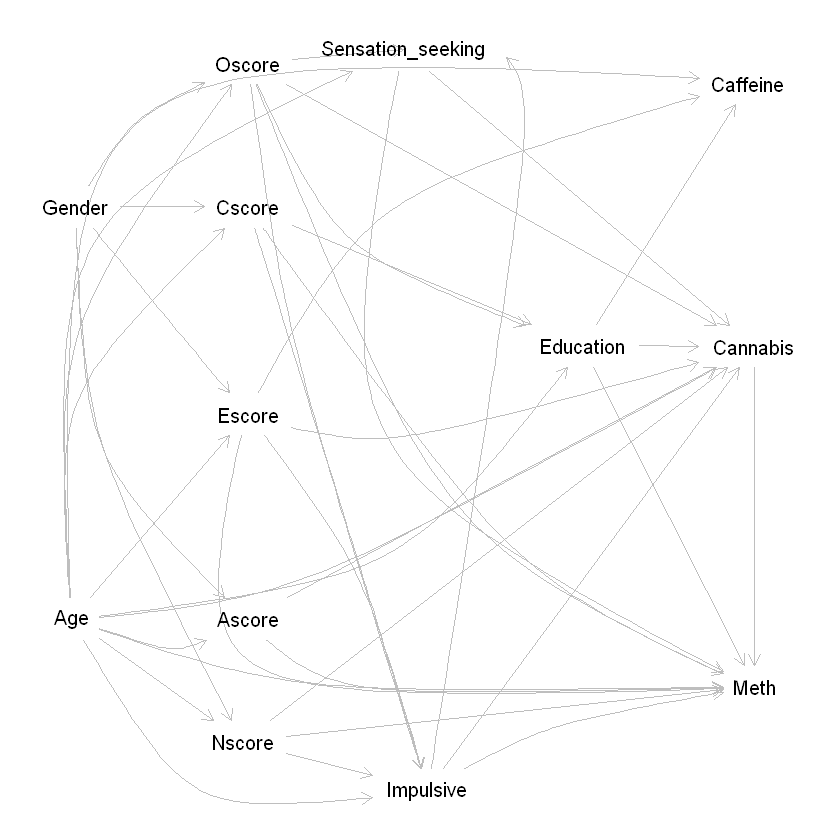

In [6]:
# Creating and plotting the DAGS (Only significant changes/versions are documented because of a space consideration)

# Version 1 which we are going to compare to the newer versions!

graph_v1 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Escore
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Meth [pos="0.429,0.676"]
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Cannabis
Escore -> Impulsive
Escore -> Meth
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}')

# Version 2 which we are going to compare to a older and newer version!

graph_v2 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Impulsive
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Meth [pos="0.357,0.605"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Education
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Education
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Education
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}
')

# Version 3 which we are going to compare to a older versions!

graph_v3 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.070,0.753"]
Ascore [pos="0.270,0.753"]
Caffeine [pos="0.839,0.112"]
Cannabis [pos="0.846,0.427"]
Cscore [pos="0.270,0.260"]
Education [pos="0.650,0.426"]
Escore [pos="0.270,0.508"]
Gender [pos="0.074,0.260"]
Impulsive [pos="0.474,0.958"]
Meth [pos="0.846,0.834"]
Nscore [pos="0.264,0.900"]
Oscore [pos="0.270,0.088"]
Sensation_seeking [pos="0.447,0.072"]
Age -> Ascore [pos="0.188,0.797"]
Age -> Caffeine [pos="0.010,0.025"]
Age -> Cannabis [pos="0.311,0.741"]
Age -> Cscore [pos="0.039,0.480"]
Age -> Education [pos="0.458,0.713"]
Age -> Escore
Age -> Impulsive [pos="0.196,0.999"]
Age -> Meth [pos="0.302,0.847"]
Age -> Nscore
Age -> Oscore [pos="0.036,0.406"]
Age -> Sensation_seeking [pos="0.024,0.257"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.350,0.851"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Impulsive [pos="0.420,0.769"]
Cscore -> Meth [pos="0.577,0.720"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine [pos="0.393,0.237"]
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive [pos="0.404,0.691"]
Escore -> Meth [pos="0.158,0.875"]
Gender -> Ascore [pos="0.077,0.567"]
Gender -> Cscore
Gender -> Escore [pos="0.199,0.421"]
Gender -> Nscore [pos="0.077,0.534"]
Gender -> Oscore [pos="0.137,0.151"]
Impulsive -> Cannabis
Impulsive -> Meth [pos="0.603,0.879"]
Impulsive -> Sensation_seeking [pos="0.609,0.085"]
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education [pos="0.364,0.319"]
Oscore -> Impulsive [pos="0.305,0.395"]
Oscore -> Meth [pos="0.480,0.679"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.329,0.574"]
}
')

plot(graph_v1)
plot(graph_v2)
plot(graph_v3)

In [7]:
# Inspecting the test statistics of the implied conditional independencies of the version 1 graph

localTests( graph_v1, sample.cov=M, sample.nobs=nrow(df),max.conditioning.variable=3 )

,estimate,p.value,2.5%,97.5%
"Age _||_ Edct | Cscr, Oscr",0.15406406,1.654290e-11,0.1096558246,0.19787999
Age _||_ Gndr,-0.12196667,1.051249e-07,-0.1662084680,-0.07724375
"Age _||_ Impl | Escr, Oscr",-0.15082585,4.400342e-11,-0.1946908336,-0.10637910
"Ascr _||_ Cffn | Age, Edct",-0.02673221,2.463106e-01,-0.0718180478,0.01846252
"Ascr _||_ Cffn | Age, Cscr, Oscr",-0.01776349,4.412509e-01,-0.0628975059,0.02744298
"Ascr _||_ Cffn | Age, Gndr",-0.01844625,4.237681e-01,-0.0635657874,0.02674848
"Ascr _||_ Cnnb | Age, Gndr",-0.09294914,5.303219e-05,-0.1375473646,-0.04797817
"Ascr _||_ Cscr | Age, Gndr",0.21365624,5.015096e-21,0.1701353433,0.25643004
"Ascr _||_ Edct | Cscr, Oscr",0.02916819,2.058493e-01,-0.0160253605,0.07424295
"Ascr _||_ Edct | Age, Gndr",0.04397682,5.638862e-02,-0.0011979956,0.08897288


In [8]:
# Inspecting the test statistics of the implied conditional independencies of the version 2 graph

localTests( graph_v2, sample.cov=M, sample.nobs=nrow(df), max.conditioning.variable=3)

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-1.662085e-01,-0.07724375
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-7.911795e-02,0.01114654
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,1.701353e-01,0.25643004
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,1.069380e-01,0.19523494
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-2.755125e-01,-0.18997667
"Ascr _||_ Oscr | Age, Gndr",0.077177270,7.994230e-04,3.211681e-02,0.12192645
"Ascr _||_ Sns_ | Age, Oscr",-0.237023433,1.109940e-25,-2.793227e-01,-0.19394589
"Ascr _||_ Sns_ | Age, Gndr",-0.162168460,1.302079e-12,-2.058581e-01,-0.11786093
"Cffn _||_ Cnnb | Age, Edct, Escr",0.112431353,9.865463e-07,6.759038e-02,0.15682550
"Cffn _||_ Cscr | Age, Edct, Escr",-0.061072952,8.033595e-03,-1.059659e-01,-0.01593248


In [9]:
# Inspecting the test statistics of the implied conditional independencies of the version 3 graph

localTests( graph_v3, sample.cov=M, sample.nobs=nrow(df),max.conditioning.variable=3 )

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.1662084680,-0.07724375
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-0.0791179535,0.01114654
"Ascr _||_ Cffn | Age, Gndr",-0.018446250,4.237681e-01,-0.0635657874,0.02674848
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.1701353433,0.25643004
"Ascr _||_ Edct | Age, Cscr, Oscr",0.024756209,2.831198e-01,-0.0204511059,0.06986261
"Ascr _||_ Edct | Age, Gndr",0.043976820,5.638862e-02,-0.0011979956,0.08897288
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.1069380088,0.19523494
"Ascr _||_ Impl | Age, Gndr",-0.197908321,3.442638e-18,-0.2409820980,-0.15411950
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-0.2755125397,-0.18997667
"Ascr _||_ Oscr | Age, Gndr",0.077177270,7.994230e-04,0.0321168054,0.12192645


In [10]:
# Inspecting the fit summaries

print("v1")
fit_v1 <- sem( toString(graph_v1,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE ) # Estimating using maximum likelihood
summary(fit_v1)

print("v2")
fit_v2 <- sem( toString(graph_v2,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE  ) # Estimating using maximum likelihood
summary(fit_v2)

print("v3")
fit_v3 <- sem( toString(graph_v3,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE  ) # Estimating using maximum likelihood
summary(fit_v3)

[1] "v1"
lavaan 0.6-7 ended normally after 21 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         47
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              2614.814
  Degrees of freedom                                41
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    1.944   

[1] "v3"
lavaan 0.6-7 ended normally after 20 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         54
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              1500.098
  Degrees of freedom                                34
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    1.944   

In [11]:
print("AIC")

AIC( fit_v1 )

AIC( fit_v2 )

AIC( fit_v3 )

print("BIC")

BIC( fit_v1 )

BIC( fit_v2 )

BIC( fit_v3 )

[1] "AIC"


[1] 55929.23

[1] 55661.18

[1] 54828.52

[1] "BIC"


[1] 56189.69

[1] 55971.52

[1] 55127.77

## Conclusion of the network building and testing

The test results above indicate that fit_v3 is the model that best describes/explains the data and causal structure of it. 
This because both the AIC and the BIC show a better fit in comparison to the earlier models/ graphs. The graphs and models were created by testing and reasoning and the last version was also the one that we felt most comfortable with in terms of representing the causal structure. So the combination of feeling that the model is accurate and the above test results lead to the usage of model v3 in the coming inference implementations.

## Reasoning table
In the cell below a very over simplified version of reasoning behind all relatons can be found. This is purely meant as a small peak into the process and the short description cannot fully describe the entirety of the reasoning.

| Relation          	|    	|                   	| Description/ reasoning                                                                                                                                                                                                              	|   	|   	|   	|   	|   	|   	|
|-------------------	|----	|-------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|---	|---	|---	|---	|---	|---	|
| Age               	| -> 	| Ascore            	| Age corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Caffeine          	| Caffeine sees trends in age-categories for example young people working might drink more coffee                                                                                                                                     	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Cannabis          	| The older a person gets the less likely it seems that they would regularly keep using Cannabis                                                                                                                                      	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Cscore            	| Age corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Education         	| The older a person gets the longer he/she had the time to finish a higher degree                                                                                                                                                    	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Escore            	| Age corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Impulsive         	| People might become more calm/ learn to better reserve themselves over time                                                                                                                                                         	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Meth              	| Even though Meth is a very addictive drug which could indicate that once you start you never stop it seems unlikely that people in the range 65+ still use Meth                                                                     	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Nscore            	| Age corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Oscore            	| Age corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Age               	| -> 	| Sensation_seeking 	| Older people might appreciate a slower lifestyle whereas younger people might feel more need to seek sensation/ explore the world                                                                                                   	|   	|   	|   	|   	|   	|   	|
| Ascore            	| -> 	| Cannabis          	| People that agree fairly easy might be more susceptible to being tricked into drug usage                                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Ascore            	| -> 	| Meth              	| People that agree fairly easy might be more susceptible to being tricked into drug usage                                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Cannabis          	| -> 	| Meth              	| Cannabis is often referred to as a gateway drug (see report for source)                                                                                                                                                             	|   	|   	|   	|   	|   	|   	|
| Cscore            	| -> 	| Education         	| Efficiency and being organized seem like influential factors in starting/finishing a higher degree                                                                                                                                  	|   	|   	|   	|   	|   	|   	|
| Cscore            	| -> 	| Impulsive         	| Chaotic/ careless people might be more impulsive due to this nature                                                                                                                                                                 	|   	|   	|   	|   	|   	|   	|
| Cscore            	| -> 	| Meth              	| Carelessness seems to be needed in some sense in order to start an infamously known addictive drug                                                                                                                                  	|   	|   	|   	|   	|   	|   	|
| Education         	| -> 	| Caffeine          	| E.g. office jobs have a stigma that people drink a lot of coffee. Someone with a higher degree might be more likely to be working in an office.                                                                                     	|   	|   	|   	|   	|   	|   	|
| Education         	| -> 	| Cannabis          	| People that might have finished a higher degree might better understand the risks of drug use, also a higher degree implies an older age which lowers is assumed to lower drug useage                                               	|   	|   	|   	|   	|   	|   	|
| Education         	| -> 	| Meth              	| Same as above                                                                                                                                                                                                                       	|   	|   	|   	|   	|   	|   	|
| Escore            	| -> 	| Caffeine          	| Very energetic people might feel less need for a "power boost" often felt by caffeine                                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Escore            	| -> 	| Cannabis          	| A more introverted person risks a lower chance of trying cannabis because a friend does the same                                                                                                                                    	|   	|   	|   	|   	|   	|   	|
| Escore            	| -> 	| Impulsive         	| Energetic people can be thought of as more impulsive (based upon real world perception)                                                                                                                                             	|   	|   	|   	|   	|   	|   	|
| Escore            	| -> 	| Meth              	| Same as with Cannabis                                                                                                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Gender            	| -> 	| Ascore            	| Gender corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Gender            	| -> 	| Cscore            	| Gender corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Gender            	| -> 	| Escore            	| Gender corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Gender            	| -> 	| Nscore            	| Gender corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Gender            	| -> 	| Oscore            	| Gender corresponds with all big five scores based upon reasoning/ literature (see report for the source)                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Impulsive         	| -> 	| Cannabis          	| An impulsive person might "impulsively" try drugs therefore having a higher risk of starting/using it                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Impulsive         	| -> 	| Meth              	| An impulsive person might "impulsively" try drugs therefore having a higher risk of starting/using it                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Impulsive         	| -> 	| Sensation_seeking 	| Impulsiveness and sensation seeking share a close relationship and sometimes combined as a single measure, based upon an idea about the world and personalities impulsiveness leading to sensation seeking seems to be more logical 	|   	|   	|   	|   	|   	|   	|
| Nscore            	| -> 	| Cannabis          	| Emotionally unstable people (for example easily suffering from depression) might seek the relaxation that Cannabis is known for                                                                                                     	|   	|   	|   	|   	|   	|   	|
| Nscore            	| -> 	| Impulsive         	| Emotionally unstable people suffer more from anxiety which might lead to impulsive behavior                                                                                                                                         	|   	|   	|   	|   	|   	|   	|
| Nscore            	| -> 	| Meth              	| Emotionally unstable people might want to feel better/ powerful which is something Meth is known for because it is a stimulant                                                                                                      	|   	|   	|   	|   	|   	|   	|
| Oscore            	| -> 	| Cannabis          	| People more open to experiences are more likely to want to experience Cannabis                                                                                                                                                      	|   	|   	|   	|   	|   	|   	|
| Oscore            	| -> 	| Education         	| Education can give plenty of new experiences which people who are open to them might seek                                                                                                                                           	|   	|   	|   	|   	|   	|   	|
| Oscore            	| -> 	| Impulsive         	| When a person is very open to new experiences he/she might impulsively try new things                                                                                                                                               	|   	|   	|   	|   	|   	|   	|
| Oscore            	| -> 	| Meth              	| People more open to experiences are more likely to want to experience Meth                                                                                                                                                          	|   	|   	|   	|   	|   	|   	|
| Oscore            	| -> 	| Sensation_seeking 	| People that are open to experiences might also be open to new sensations which they seek                                                                                                                                            	|   	|   	|   	|   	|   	|   	|
| Sensation_seeking 	| -> 	| Cannabis          	| Cannabis can be seen as a sensational drug to use                                                                                                                                                                                   	|   	|   	|   	|   	|   	|   	|
| Sensation_seeking 	| -> 	| Meth              	| Meth can be seen as a sensational drug to use                                                                                                                                                                                       	|   	|   	|   	|   	|   	|   	|